In [5]:
#参考：https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
iris = load_iris()
X = iris.data
y = iris.target


In [31]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [32]:
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [4]:
clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)

In [44]:
# clf.tree_
# type(clf.tree_)
# clf.tree_.feature
# help(np.zeros)
# clf.tree_.node_count
# type(clf.tree_.node_count)
# type(clf.tree_.feature)
# clf.tree_.children_left
is_leaves

array([False, False, False, False, False])

In [6]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value


In [28]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)

In [34]:
# node_depth
# type(node_depth)
# type(stack)
# help(list.pop)
# len(stack)
stack
# stack.pop()

[(0, 0)]

In [43]:
print(
"%s %s " % (children_left[0],children_right[0])
)

1 2 


In [45]:
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)

The binary tree structure has 5 nodes and has the following tree structure:



In [47]:
# n_nodes
is_leaves

array([False,  True, False,  True,  True])

In [50]:

for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
            )
        )

node=0 is a split node with value=[[37. 34. 41.]]: go to node 1 if X[:, 3] <= 0.800000011920929 else to node 2.
	node=1 is a leaf node with value=[[37.  0.  0.]].
	node=2 is a split node with value=[[ 0. 34. 41.]]: go to node 3 if X[:, 2] <= 4.950000047683716 else to node 4.
		node=3 is a leaf node with value=[[ 0. 33.  3.]].
		node=4 is a leaf node with value=[[ 0.  1. 38.]].


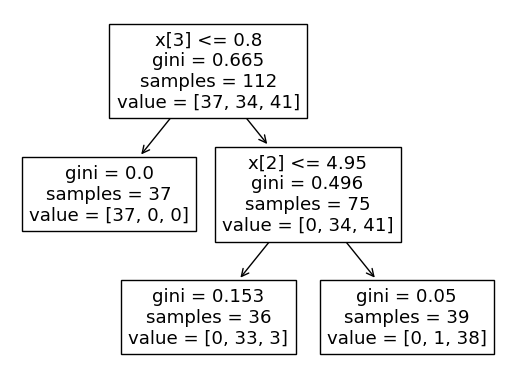

In [51]:
tree.plot_tree(clf)
plt.show()

In [52]:
node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)

In [73]:
# help(DecisionTreeClassifier.decision_path)
# type(node_indicator)
# node_indicator.indptr
help(node_indicator)
# node_indicator

# node_indicator.indices

Help on csr_matrix in module scipy.sparse._csr object:

class csr_matrix(scipy.sparse._compressed._cs_matrix)
 |  csr_matrix(arg1, shape=None, dtype=None, copy=False)
 |  
 |  Compressed Sparse Row matrix
 |  
 |  This can be instantiated in several ways:
 |      csr_matrix(D)
 |          with a dense matrix or rank-2 ndarray D
 |  
 |      csr_matrix(S)
 |          with another sparse matrix S (equivalent to S.tocsr())
 |  
 |      csr_matrix((M, N), [dtype])
 |          to construct an empty matrix with shape (M, N)
 |          dtype is optional, defaulting to dtype='d'.
 |  
 |      csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
 |          where ``data``, ``row_ind`` and ``col_ind`` satisfy the
 |          relationship ``a[row_ind[k], col_ind[k]] = data[k]``.
 |  
 |      csr_matrix((data, indices, indptr), [shape=(M, N)])
 |          is the standard CSR representation where the column indices for
 |          row i are stored in ``indices[indptr[i]:indptr[i+1]]`` and their


In [66]:
sample_id = 2
# obtain ids of the nodes `sample_id` goes through, i.e., row `sample_id`
node_index = node_indicator.indices[
    node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]

In [67]:
node_index
# sample_id
# leaf_id[1]

array([0, 1])

In [68]:
print("Rules used to predict sample {id}:\n".format(id=sample_id))

for node_id in node_index:
    # continue to the next node if it is a leaf node
    if leaf_id[sample_id] == node_id:
        continue

    # check if value of the split feature for sample 0 is below threshold
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold})".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 2:

decision node 0 : (X_test[2, 3] = 0.2) <= 0.800000011920929)


In [74]:
sample_ids = [0, 1]
# boolean array indicating the nodes both samples go through
common_nodes = node_indicator.toarray()[sample_ids].sum(axis=0) == len(sample_ids)


In [75]:
# obtain node ids using position in array
common_node_id = np.arange(n_nodes)[common_nodes]

print(
    "\nThe following samples {samples} share the node(s) {nodes} in the tree.".format(
        samples=sample_ids, nodes=common_node_id
    )
)
print("This is {prop}% of all nodes.".format(prop=100 * len(common_node_id) / n_nodes))


The following samples [0, 1] share the node(s) [0 2] in the tree.
This is 40.0% of all nodes.


In [1]:
from sklearn.preprocessing import StandardScaler

In [3]:
ss = StandardScaler()

In [12]:
X = ss.fit_transform(X)
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
from sklearn.decomposition import PCA

pac = PCA(n_components=2)

X3 = pac.fit_transform(X)
X3

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

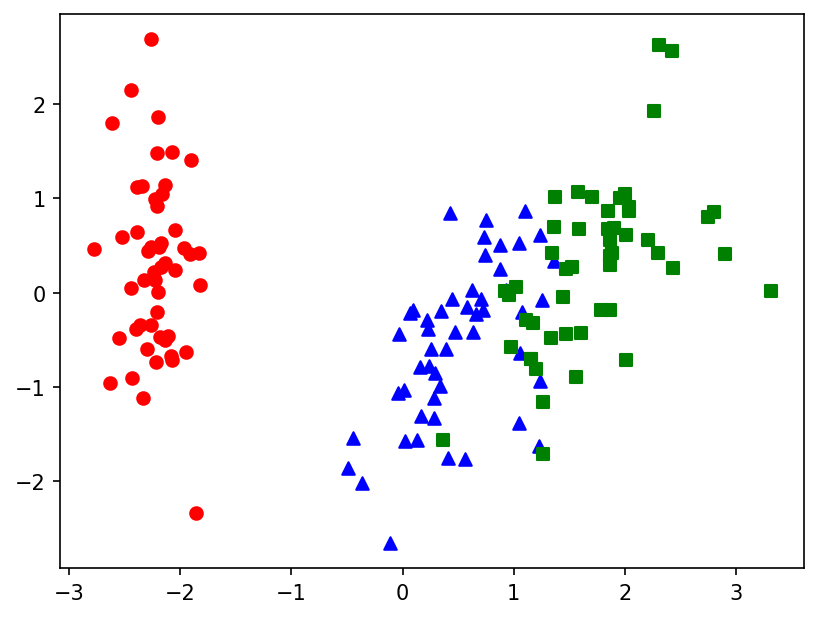

In [22]:
from matplotlib import pyplot as plt

colors = ["red","blue","green"]

markers = ['o','^','s']

plt.figure(dpi=150)

for i in range(len(X3)):
    plt.scatter(X3[i,0],X3[i,1],c=colors[y[i]],marker=markers[y[i]])

plt.show()

In [24]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)

X4 = isomap.fit_transform(X)
X4

array([[ 5.20512391e+00, -1.61272094e-01],
       [ 3.99363667e+00, -8.63683411e-02],
       [ 4.34861113e+00, -8.49150720e-02],
       [ 4.05582155e+00, -6.43415490e-02],
       [ 5.46373312e+00, -1.71945052e-01],
       [ 6.55601766e+00, -2.12729886e-01],
       [ 4.78312781e+00, -1.05761991e-01],
       [ 4.93987104e+00, -1.49905121e-01],
       [ 3.51795345e+00, -2.84845321e-02],
       [ 4.24288068e+00, -9.57988054e-02],
       [ 6.01071166e+00, -1.90054670e-01],
       [ 5.03268481e+00, -1.27853209e-01],
       [ 4.05697586e+00, -6.87987908e-02],
       [ 3.80621952e+00,  5.70217203e-03],
       [ 7.01156733e+00, -2.26167331e-01],
       [ 7.75025254e+00, -2.58034059e-01],
       [ 6.55028381e+00, -2.12879119e-01],
       [ 5.23534238e+00, -1.58920563e-01],
       [ 6.44339624e+00, -2.00633129e-01],
       [ 6.09650048e+00, -1.95290814e-01],
       [ 5.29509096e+00, -1.28396262e-01],
       [ 5.83412699e+00, -1.85500124e-01],
       [ 5.31562382e+00, -1.32224990e-01],
       [ 5.

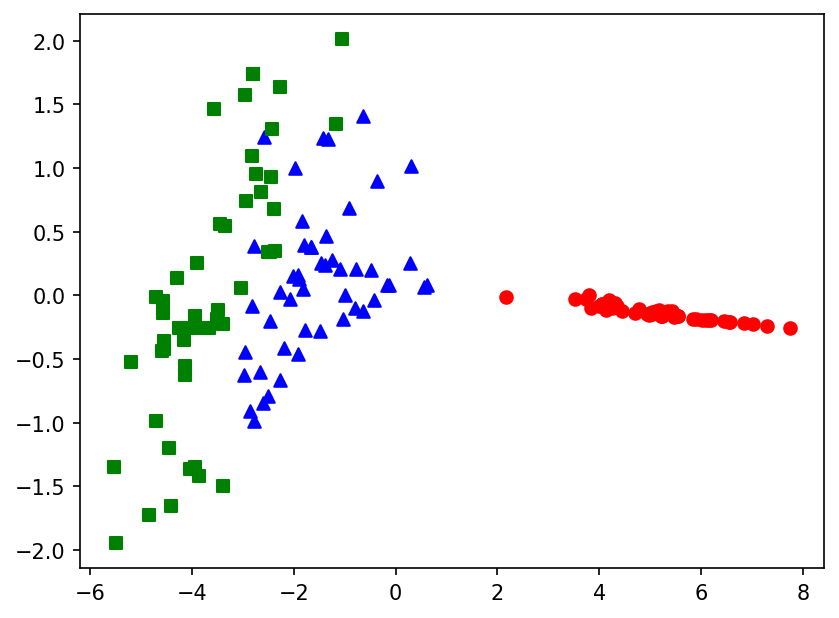

In [25]:
#Isomap解决了3D流形分布数据的2D降维问题
plt.figure(dpi=150)

for i in range(len(X4)):
    plt.scatter(X4[i,0],X4[i,1],c=colors[y[i]],marker=markers[y[i]])

plt.show()

In [27]:
#局部线性嵌入(LocallyLinearEmbedding,LLE)算法与传统的 PCA 等关注样本方差的降维方法相比,更注重在降维时保持样本局部的线性特征。由于 LLE在降维时保持了样本的局部特征,它广泛地用于图像识别、高维数据可视化等领域。
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2)

X5= lle.fit_transform(X)
X5

array([[-0.12063156, -0.00099108],
       [-0.12063156, -0.00093403],
       [-0.12063156, -0.00093102],
       [-0.12063156, -0.00093257],
       [-0.12063156, -0.00101044],
       [-0.12063156, -0.00101619],
       [-0.12063156, -0.00096737],
       [-0.12063156, -0.00097145],
       [-0.12063156, -0.00093287],
       [-0.12063156, -0.00093097],
       [-0.12063156, -0.00101502],
       [-0.12063156, -0.00096882],
       [-0.12063156, -0.00093367],
       [-0.12063156, -0.00093232],
       [-0.12063156, -0.00102169],
       [-0.12063156, -0.00102425],
       [-0.12063156, -0.00101552],
       [-0.12063156, -0.00098828],
       [-0.12063156, -0.00101875],
       [-0.12063156, -0.00101246],
       [-0.12063156, -0.00096751],
       [-0.12063156, -0.00101179],
       [-0.12063156, -0.00101669],
       [-0.12063156, -0.00095334],
       [-0.12063156, -0.00096725],
       [-0.12063156, -0.0009332 ],
       [-0.12063156, -0.00096936],
       [-0.12063156, -0.00099078],
       [-0.12063156,

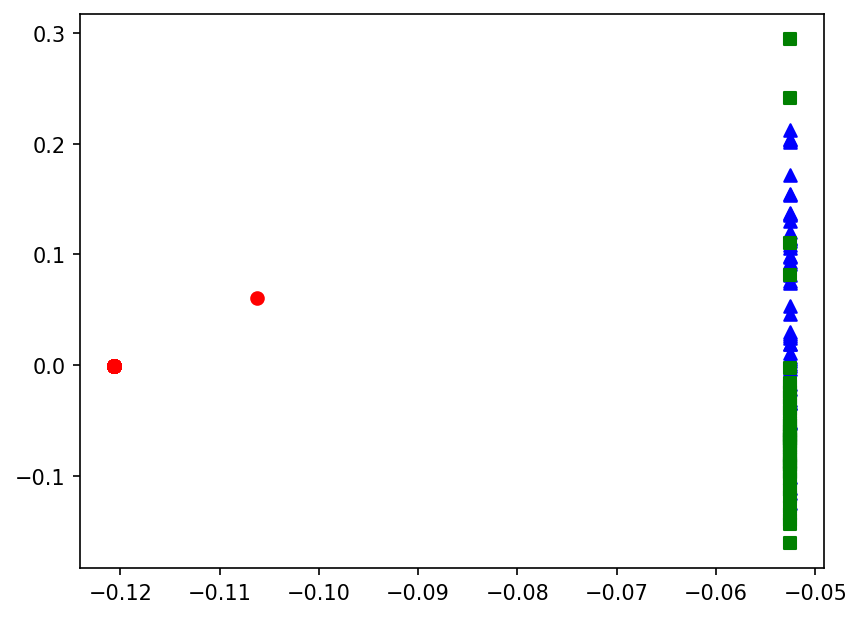

In [28]:
#Isomap解决了3D流形分布数据的2D降维问题
plt.figure(dpi=150)

for i in range(len(X5)):
    plt.scatter(X5[i,0],X5[i,1],c=colors[y[i]],marker=markers[y[i]])

plt.show()

In [29]:
#t分布随机邻域嵌入(t-distributedStochasticNeighborEmbedding,t-SNE),是一种用来探索高维数据的非线性降维机器学习算法。

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)

X6 = tsne.fit_transform(X)
X6

array([[-2.66322746e+01, -2.69541669e+00],
       [-2.28020954e+01, -3.00133514e+00],
       [-2.39202518e+01, -2.08869362e+00],
       [-2.31612530e+01, -1.96354425e+00],
       [-2.71768055e+01, -2.17309785e+00],
       [-2.89886112e+01, -2.68883348e+00],
       [-2.50311317e+01, -1.44733322e+00],
       [-2.56524811e+01, -2.56849837e+00],
       [-2.21066875e+01, -2.08000374e+00],
       [-2.35178394e+01, -2.98281145e+00],
       [-2.80934105e+01, -3.15246892e+00],
       [-2.53368816e+01, -1.96540034e+00],
       [-2.27059784e+01, -2.58782029e+00],
       [-2.24921436e+01, -1.49991548e+00],
       [-2.95213318e+01, -3.24269843e+00],
       [-3.01311035e+01, -2.75285292e+00],
       [-2.89893360e+01, -2.77995682e+00],
       [-2.66095009e+01, -2.65070176e+00],
       [-2.88182850e+01, -3.42418933e+00],
       [-2.83570385e+01, -2.19761062e+00],
       [-2.64200878e+01, -3.74051952e+00],
       [-2.78112812e+01, -2.24206042e+00],
       [-2.65965137e+01, -1.08488810e+00],
       [-2.

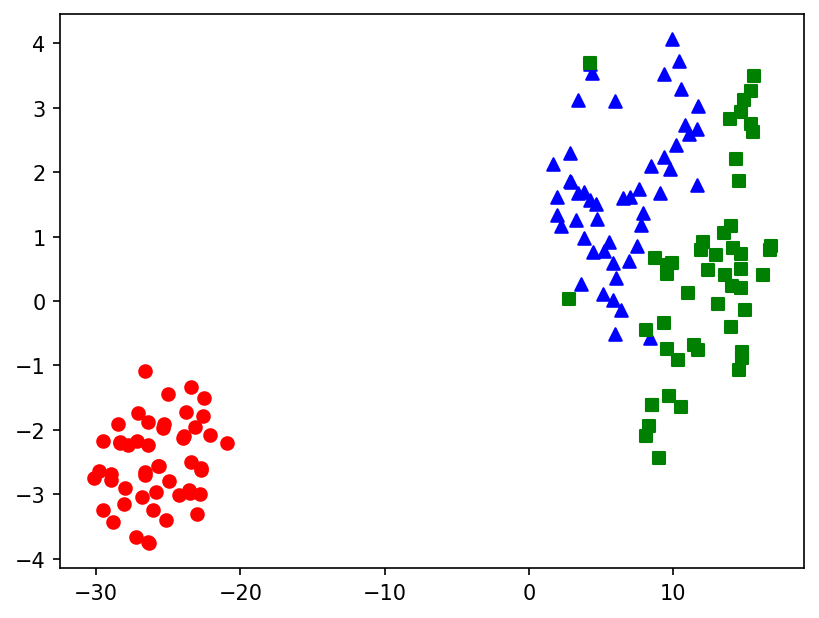

In [30]:
#Isomap解决了3D流形分布数据的2D降维问题
plt.figure(dpi=150)

for i in range(len(X6)):
    plt.scatter(X6[i,0],X6[i,1],c=colors[y[i]],marker=markers[y[i]])

plt.show()